### (1) 데이터 가져오기  
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
여기에서 데이터를 상세히 확인할 수 있습니다.  


In [40]:
import warnings
warnings.filterwarnings('ignore')
help(warnings.filterwarnings)
# ignore를 통해 파이썬에서 불필요한 경고문구를 없애줌

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime



Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).

    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters



In [41]:
train = pd.read_csv('/Users/jundol/Documents/code_study/JS_ipel/pr3_11.04/bike_regression/data/bike-sharing-demand/train.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB



### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
to_datetime 활용 : 링크 참조  
pandas datetime extract year month day 키워드로 검색해 보기  


In [43]:
# datetime - hourly date + timestamp  

train.datetime = pd.to_datetime(train.datetime,errors='coerce')
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train.head())


             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
sns.countplot 활용해서 시각화하기  
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기  


[Text(0.5, 1.0, 'Second')]

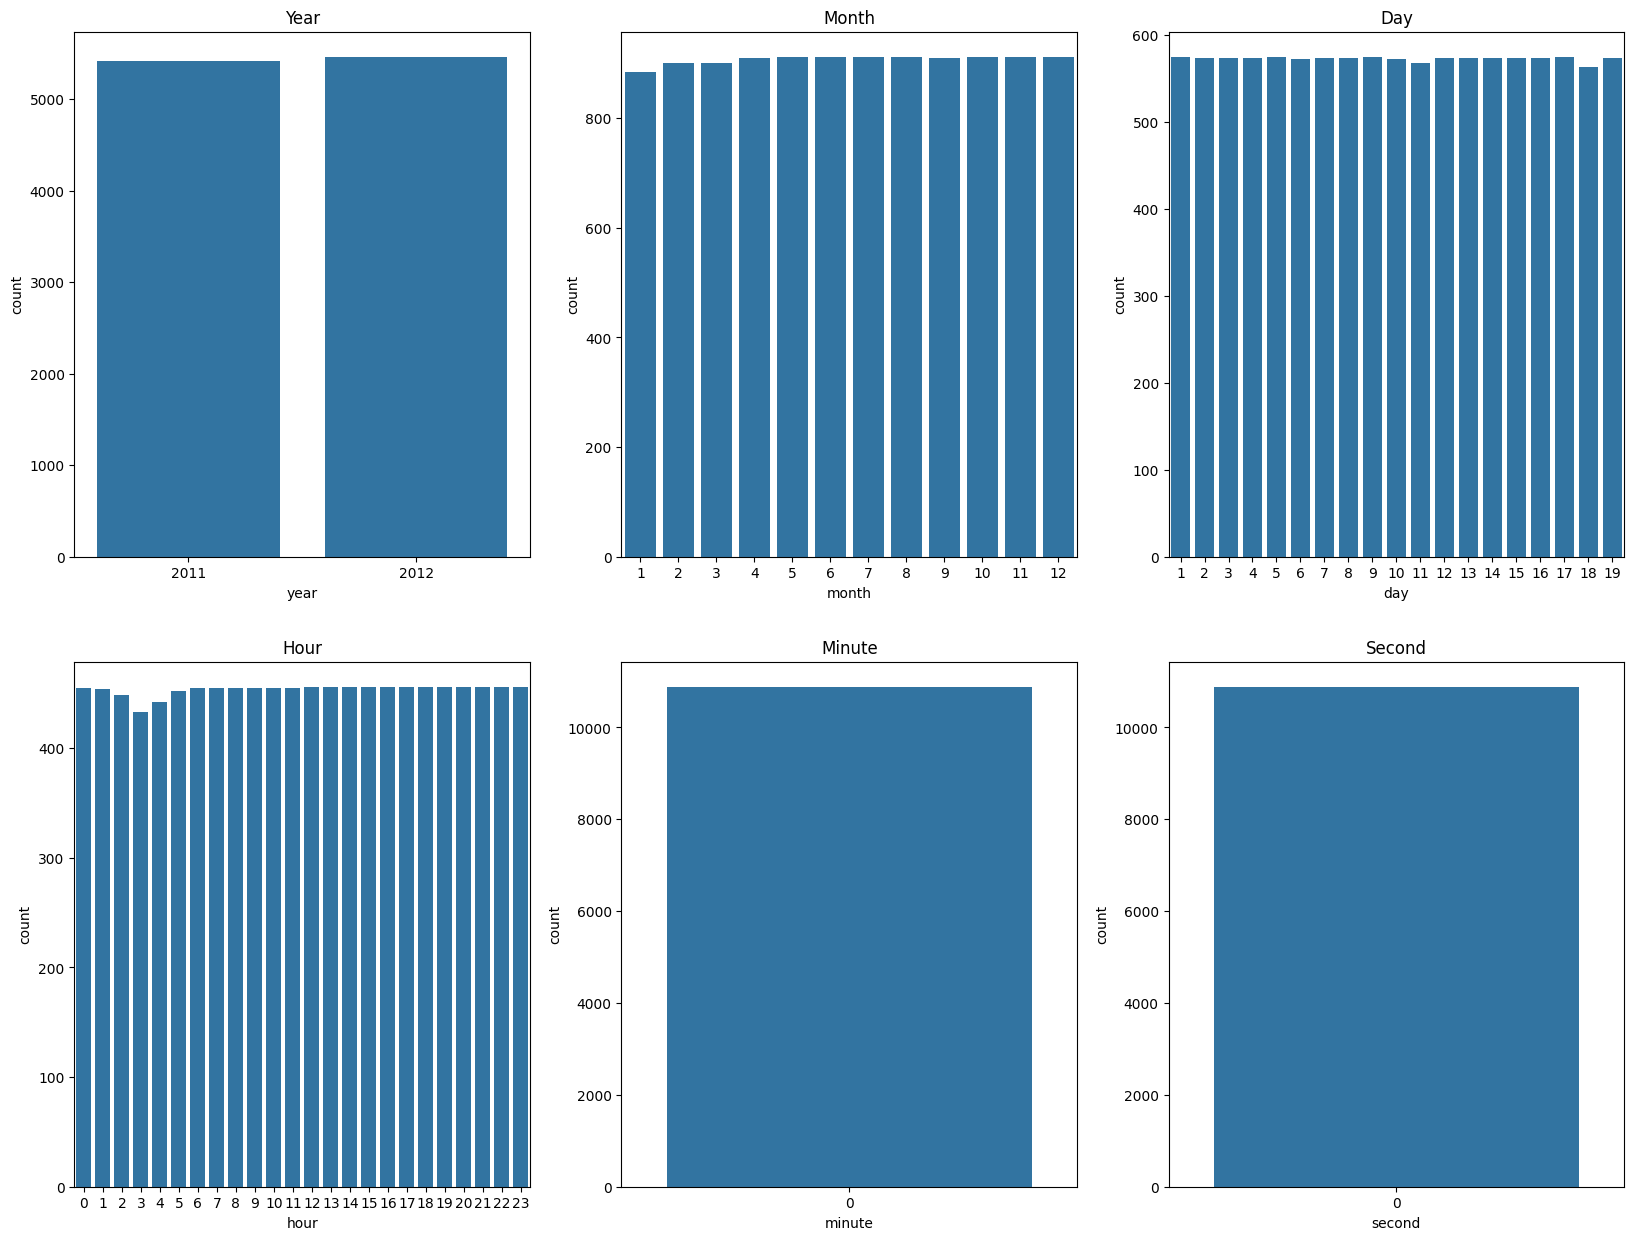

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20, 15))

sns.countplot(data=train, x='year', ax=axs[0, 0]).set(title='Year')
sns.countplot(data=train, x='month', ax=axs[0, 1]).set(title='Month')
sns.countplot(data=train, x='day', ax=axs[0, 2]).set(title='Day')
sns.countplot(data=train, x='hour', ax=axs[1, 0]).set(title='Hour')
sns.countplot(data=train, x='minute', ax=axs[1, 1]).set(title='Minute')
sns.countplot(data=train, x='second', ax=axs[1, 2]).set(title='Second')




### (4) X, y 컬럼 선택 및 train/test 데이터 분리  
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?  

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [45]:
from sklearn.model_selection import train_test_split
print(train.head())

#필요를 다한 tempDate column을 drop함
original_train = train

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

In [46]:
drop_columns = [ 'datetime', 'casual', 'registered', 'count']
train = train.drop(drop_columns,axis=1)
y = original_train['count']

In [48]:
X = train

In [49]:
# train test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### (5) LinearRegression 모델 학습  
sklearn의 LinearRegression 모델 불러오기 및 학습하기  


In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
학습된 모델에 X_test를 입력해서 예측값 출력하기  
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
mse 값과 함께 rmse 값도 계산하기  


In [52]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

MSE: 19945.370
RMSE: 141.228



### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기  

'\n# sex feature를 삭제한 data\n\nplt.scatter(X_test[:, 0], y_test, label="Actual values")\nplt.scatter(X_test[:, 0], prediction2, c=\'red\', label="Predicted values")\n\nplt.xlabel("First Feature of X_test = Age")  # X_test의 첫 번째 특성 = age\nplt.ylabel("Target Value = Diabets level")  # 타겟 값 = 당뇨수치\n\nplt.title("Actual vs Predicted Values")\nplt.legend()\n'

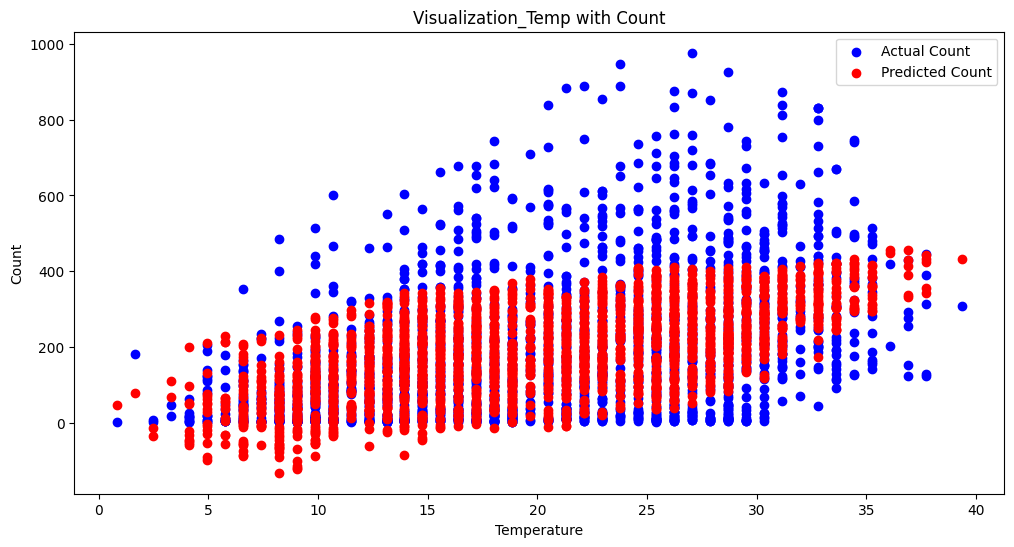

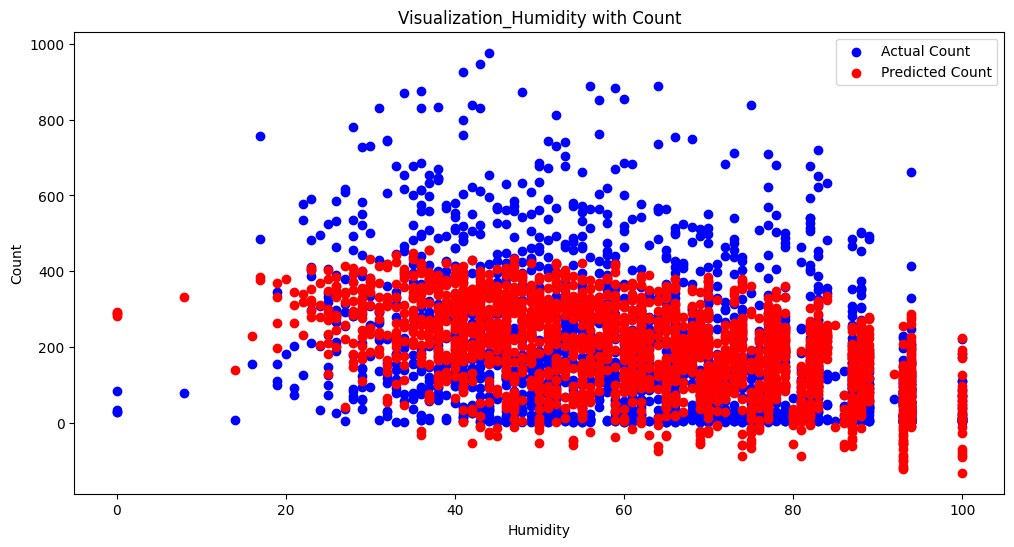

In [55]:
# temp vs count 시각화
plt.figure(figsize=(12, 6))

plt.scatter(X_test['temp'], y_test, label='Actual Count', c='blue', )
plt.scatter(X_test['temp'], pred, label='Predicted Count', c='red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Visualization_Temp with Count')
plt.legend()


# humidity vs count 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X_test['humidity'], y_test, label='Actual Count', c="blue")
plt.scatter(X_test['humidity'], pred, label='Predicted Count', c="red")
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Visualization_Humidity with Count')
plt.legend()



### 추가 과정 시도